Cloning into 'yolov5'...
remote: Enumerating objects: 17360, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 17360 (delta 36), reused 18 (delta 18), pack-reused 17308 (from 2)
Receiving objects: 100% (17360/17360), 16.24 MiB | 27.31 MiB/s, done.
Resolving deltas: 100% (11904/11904), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s e

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-4-6 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

100%|██████████| 40.8M/40.8M [00:00<00:00, 200MB/s]

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Saved 1 image to output


          xmin        ymin        xmax        ymax  confidence  class  \
0   100.565491  433.195984  362.754822  629.248230    0.882681      2   
1   389.233826  135.392380  621.057007  248.855148    0.882265      5   
2   409.648590  433.202087  637.381348  581.207581    0.873464      2   
3    83.627945  286.468140  211.397354  379.662170    0.841351      2   
4   239.247833  287.638794  390.337677  396.860168    0.811051      2   
6   454.504791  252.524017  596.292847  319.724762    0.735920      2   
7   318.419250   93.779465  444.557983  165.586563    0.681190      5   
9   191.212997  222.191772  297.619141  300.057739    0.597277      2   
10  321.119324  458.875824  390.555115  543.379944    0.593534      3   
11   49.770123  220.318893  158.985611  282.948517    0.569964      2   
12   53.327156  299.839661   92.377007  355.489807    0.549537      3   
14  162.027069  166.095139  258.041779  272.599121    0.510302      7   
17  523.457458  310.455933  632.247009  405.285034 

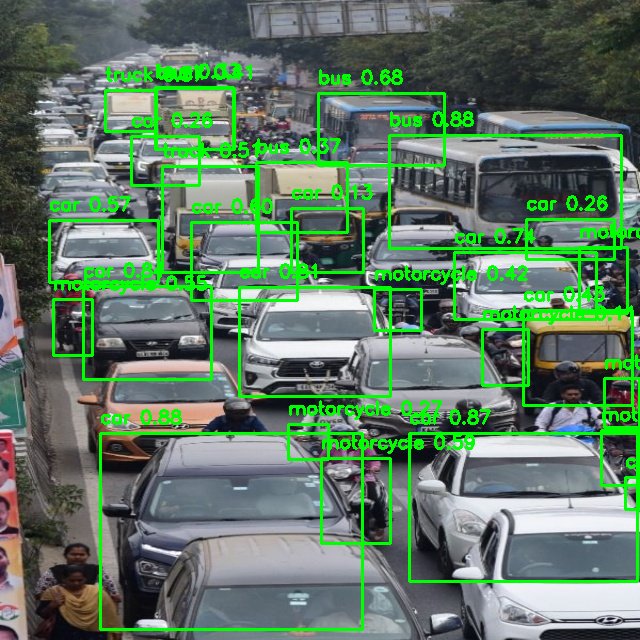

In [ ]:
# Traffic signal final code
#Clone YOLOv5 and install dependencies
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


# Import required libraries
import cv2
import numpy as np
import torch
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

# Loading the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5m')

# Preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    # Resize image to YOLO's input size
    image = cv2.resize(image, (640, 640))
    # Convert to RGB for compatibility
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Filter vehicle detections
def filter_vehicle_detections(results):
    vehicle_classes = ['car', 'truck', 'bus', 'motorcycle']  # Only detect vehicles
    predictions = results.pandas().xyxy[0]  # Convert YOLO detections to a Pandas DataFrame
    return predictions[predictions['name'].isin(vehicle_classes)]

# Draw bounding boxes for detected vehicles
def draw_boxes(image_path, detections):
    image = cv2.imread(image_path)
    for _, row in detections.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        label = row['name']
        confidence = row['confidence']
        color = (0, 255, 0)  # Green hexc
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, f"{label} {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Display the image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(image_rgb))

# Count vehicles from YOLO detections
def count_vehicles(detections):
    return len(detections)

# Calculate region-wise vehicle density with finer grid
def grid_density_high_resolution(image_path, detections, grid_size=5):
    image = cv2.imread(image_path)
    height, width = image.shape[:2]
    grid_height = height // grid_size
    grid_width = width // grid_size
    grid_counts = np.zeros((grid_size, grid_size))

    # Count vehicles in each grid cell
    for _, row in detections.iterrows():
        x_center = (row['xmin'] + row['xmax']) / 2
        y_center = (row['ymin'] + row['ymax']) / 2
        grid_x = int(x_center // grid_width)
        grid_y = int(y_center // grid_height)
        if 0 <= grid_x < grid_size and 0 <= grid_y < grid_size:
            grid_counts[grid_y, grid_x] += 1

    return grid_counts

# Visualize a matrix
def visualize_matrix(matrix, title, grid_size):
    plt.figure(figsize=(10, 8))
    plt.imshow(matrix, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Value')
    plt.title(title)
    plt.xlabel('Grid Column')
    plt.ylabel('Grid Row')
    plt.xticks(np.arange(grid_size))
    plt.yticks(np.arange(grid_size))
    plt.show()

# Compute Vehicle Density Matrix
def compute_vehicle_density_matrix(grid_counts, cell_area):
    density_matrix = grid_counts / cell_area  # Density = count / area
    return density_matrix

# Compute Queue Length
def compute_queue_length(detections, stop_line_y):
    max_y = 0
    for _, row in detections.iterrows():
        max_y = max(max_y, row['ymax'])
    queue_length = max_y - stop_line_y if max_y > stop_line_y else 0
    return queue_length

# Determine Green Signal Duration
def calculate_green_signal_duration(vehicle_count_matrix, density_matrix, queue_length, queue_threshold=120):
    """
    Determines green signal duration based on density and queue length.

    Args:
    - vehicle_count_matrix (np.array): Matrix of vehicle counts for each grid cell.
    - density_matrix (np.array): Matrix of vehicle densities for each grid cell.
    - queue_length (float): Length of the queue in pixels.
    - queue_threshold (int): Threshold for queue length.

    Returns:
    - green_signal_duration (int): Duration for the green signal in seconds.
    """
    # Check x3 and x4 columns for high vehicle count and density
    high_density_count = np.sum(vehicle_count_matrix[:, 3:5] >= 3)  # Check count in col 3,4
    high_density = np.sum(density_matrix[:, 3:5] >= 0.005)  # Check high density

    if high_density_count > 0 and queue_length > queue_threshold:
        return 90  # in secs
    else:
        return 40  # in secs

# Main Workflow
image_path = '/content/traffic.jpg'

# Image preprocessing
preprocessed_image = preprocess_image(image_path)
temp_image_path = 'preprocessed_temp.jpg'
cv2.imwrite(temp_image_path, cv2.cvtColor(preprocessed_image, cv2.COLOR_RGB2BGR))

# detection
model.conf = 0.1  #confidence threshold
model.iou = 0.05  #Iou limit
results = model(temp_image_path)
results.save(save_dir='output')

# Filter and count vehicles
vehicle_detections = filter_vehicle_detections(results)
print(vehicle_detections)
vehicle_count = count_vehicles(vehicle_detections)
print(f"Total vehicles detected: {vehicle_count}")

#Road n cell area
road_area = 640 * 320
cell_area = road_area / (5 * 5)

# Here we count the vehicles present in each grid
grid_size = 5  # 5x5 grid
grid_counts = grid_density_high_resolution(temp_image_path, vehicle_detections, grid_size)

# Density Matrix
density_matrix = compute_vehicle_density_matrix(grid_counts, cell_area)
print("Vehicle Count Matrix:")
print(grid_counts)
print("Vehicle Density Matrix:")
print(density_matrix)

# matrices
visualize_matrix(grid_counts, "Vehicle Count Matrix", grid_size)
visualize_matrix(density_matrix, "Vehicle Density Matrix", grid_size)

# Queue Length
stop_line_y = 500
queue_length = compute_queue_length(vehicle_detections, stop_line_y)
print(f"Queue Length: {queue_length} pixels")

# Green signal duration
green_signal_duration = calculate_green_signal_duration(grid_counts, density_matrix, queue_length, queue_threshold=120)
print(f"Green Signal Duration: {green_signal_duration} seconds")


draw_boxes(temp_image_path, vehicle_detections)


In [ ]:
def visualize_matrix(matrix, title, grid_size):
    plt.figure(figsize=(10, 8))
    plt.imshow(matrix, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Value')
    plt.title(title)
    plt.xlabel('Grid Column')
    plt.ylabel('Grid Row')
    plt.xticks(np.arange(grid_size))
    plt.yticks(np.arange(grid_size))
    plt.show()


In [ ]:
from ultralytics import YOLO
import torch
import cv2

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

model = YOLO("yolov8n.pt").to(device)

cap = cv2.VideoCapture("traffic.mp4")

frame_width = 640
frame_height = 480

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break


    frame = cv2.resize(frame, (frame_width, frame_height))

    results = model(frame, device=device)
    vehicle_count = len(results[0].boxes)


    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)


    cv2.putText(frame, f"Vehicles: {vehicle_count}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    cv2.imshow("Traffic Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

Using device: cuda


100%|██████████| 6.25M/6.25M [00:00<00:00, 74.0MB/s]


In [ ]:
from ultralytics import YOLO
import torch
import cv2
import os
from IPython.display import Video, display

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

model = YOLO("yolov8n.pt").to(device)

cap = cv2.VideoCapture("traffic.mp4")

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Output file
output_path = 'output.mp4'
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

vehicle_classes = [2, 3, 5, 7]  # Car, motorcycle, bus, truck

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)[0]
    vehicle_count = 0

    for box in results.boxes:
        cls_id = int(box.cls)
        if cls_id in vehicle_classes:
            vehicle_count += 1
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    cv2.putText(frame, f"Vehicles: {vehicle_count}", (20, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    out.write(frame)

cap.release()
out.release()
# Display the output video
display(Video("output.mp4", embed=True, width=640, height=480))


Using device: cuda


In [ ]:
import cv2
from ultralytics import YOLO

# Load YOLOv8 model with tracking enabled
model = YOLO('yolov8s.pt', task='track')

# Load video
cap = cv2.VideoCapture('traffic.mp4')

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
output_path = 'output_with_lines_and_counts.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Define the coordinates for the left and right lines
line_left = (30, 300, 370, 300)  # Green line
line_right = (540, 300, 830, 300)  # Red line

# Counters for vehicle crossings
crossings_left = 0
crossings_right = 0

# Dictionary to store vehicle positions and their crossing status
vehicle_positions = {}
crossed_left = set()  # Vehicles that crossed the green line
crossed_right = set()  # Vehicles that crossed the red line

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection and tracking
    results = model.track(source=frame, persist=True, conf=0.5)

    for result in results:
        for box in result.boxes:
            # Extract bounding box coordinates and label
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            label = result.names[int(box.cls[0])]  # Class label
            confidence = box.conf[0]  # Confidence score

            # Check if the detected object is a car or truck
            if label in ['car', 'truck'] and confidence > 0.5:
                vehicle_center_x = int((x1 + x2) / 2)
                vehicle_center_y = int((y1 + y2) / 2)

                # Use ID from YOLO tracking
                if box.id is not None:
                    obj_id = int(box.id[0])

                    if obj_id not in vehicle_positions:
                        vehicle_positions[obj_id] = (vehicle_center_x, vehicle_center_y)
                    else:
                        prev_x, prev_y = vehicle_positions[obj_id]

                        # Check if the vehicle crosses the left line (green line)
                        if obj_id not in crossed_left and line_left[0] <= vehicle_center_x <= line_left[2]:
                            # Moving downward (toward the camera)
                            if prev_y < line_left[1] and vehicle_center_y >= line_left[1]:
                                crossings_left += 1
                                crossed_left.add(obj_id)  # Mark as crossed

                        # Check if the vehicle crosses the right line (red line)
                        if obj_id not in crossed_right and line_right[0] <= vehicle_center_x <= line_right[2]:
                            # Moving upward (away from the camera)
                            if prev_y > line_right[1] and vehicle_center_y <= line_right[1]:
                                crossings_right += 1
                                crossed_right.add(obj_id)  # Mark as crossed

                        # Update position
                        vehicle_positions[obj_id] = (vehicle_center_x, vehicle_center_y)

                # Draw bounding box and label
                cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(frame, f"ID {obj_id}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Draw the lines
    cv2.line(frame, (line_left[0], line_left[1]), (line_left[2], line_left[3]), (0, 255, 0), 3)  # Green line
    cv2.line(frame, (line_right[0], line_right[1]), (line_right[2], line_right[3]), (0, 0, 255), 3)  # Red line

    # Display the counts
    cv2.putText(frame, f'Left line crossings (toward camera): {crossings_left}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(frame, f'Right line crossings (away from camera): {crossings_right}', (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Write the frame to the output video
    out.write(frame)

    # Display the frame (optional, you can comment this for faster execution)
    cv2.imshow('Frame', frame)

    # Break on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Video saved to {output_path}")
display(Video("output.mp4", embed=True, width=640, height=480))

Video saved to output_with_lines_and_counts.mp4
